<a href="https://colab.research.google.com/github/Blaisekhan/Capstone-project/blob/main/Capstone_codes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Importing Libraries
import numpy as np
import pandas as pd
import math
import json
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.externals import joblib
import scipy.sparse
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings; warnings.simplefilter('ignore')
%matplotlib inline


/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
#Importing dataset into colab. dataset Amazzon electronics ratings 2014

from google.colab import files
uploaded = files.upload()

Saving ratings_Electronics.csv to ratings_Electronics.csv


In [6]:
import io


In [8]:
ratings = pd.read_csv(io.BytesIO(uploaded['ratings_Electronics.csv']))

In [9]:
ratings.head(10 )

,AKM1MP6P0OYPR,0132793040,5.0,1365811200
0,A2CX7LUOHB2NDG,0321732944,5.0,1341100800
1,A2NWSAGRHCP8N5,0439886341,1.0,1367193600
2,A2WNBOD3WNDNKT,0439886341,3.0,1374451200
3,A1GI0U4ZRJA8WN,0439886341,1.0,1334707200
4,A1QGNMC6O1VW39,0511189877,5.0,1397433600
5,A3J3BRHTDRFJ2G,0511189877,2.0,1397433600
6,A2TY0BTJOTENPG,0511189877,5.0,1395878400
7,A34ATBPOK6HCHY,0511189877,5.0,1395532800
8,A89DO69P0XZ27,0511189877,5.0,1395446400
9,AZYNQZ94U6VDB,0511189877,5.0,1401321600


In [4]:
#importing the updated dataset Amazon electronics ratings 2018
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [36]:
#Load dataset
ratings_electronics = pd.read_csv('/content/drive/MyDrive/Electronics/Electronics.csv', names=['ProductID', 'UserID','Rating', 'Timestamp'])


In [37]:
#Snippet of dataset

ratings_electronics.head()


,ProductID,UserID,Rating,Timestamp
0,0060009810,A1N070NS9CJQ2I,5.0,1026864000
1,0060009810,A3P0KRKOBQK1KN,5.0,1025913600
2,0060009810,A192HO2ICJ75VU,5.0,1025654400
3,0060009810,A2T278FKFL3BLT,4.0,1025395200
4,0060009810,A2ZUXVTW8RXBXW,5.0,1025222400


In [38]:
#Print data shape in order to determine the subset needed for the analysis
ratings_electronics.shape

(20994353, 4)

In [39]:
#Data types

ratings_electronics.dtypes

ProductID     object
UserID        object
Rating       float64
Timestamp      int64
dtype: object

In [40]:
#The dataset has 20,994,353 rows and 4 columns 
#Choosing a subset of the data using iLoc to select rows .iloc[<row_selection>, <column_selection>]

ratings_electronics = ratings_electronics.iloc[:2000000,0:]

ratings_electronics.shape








(2000000, 4)

In [41]:
#information about the data

ratings_electronics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   ProductID  object 
 1   UserID     object 
 2   Rating     float64
 3   Timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 61.0+ MB


In [46]:
#Data summary
ratings_electronics.describe()['Rating']

count    2.000000e+06
mean     4.124842e+00
std      1.327276e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: Rating, dtype: float64

In [47]:
#Saving subset to google drive

ratings_electronics.to_csv('/content/drive/MyDrive/Electronics/ratings_electronics.csv')



In [48]:
ratings_electronics.shape

(2000000, 4)

In [55]:
#Checking for min and max ratings

print('The minimum rating is', ratings_electronics.Rating.min(),  'and the maximum rating is', 
      ratings_electronics.Rating.max(), 'which implies that the rating for the each product \nranges from 0 to 5')

The minimum rating is 1.0 and the maximum rating is 5.0 which implies that the rating for the each product 
ranges from 0 to 5


In [2]:
#importing the data subset - Amazon electronics ratings 2018
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
ratings_electronics = pd.read_csv('/content/drive/MyDrive/Electronics/ratings_electronics.csv')

In [12]:
#Checking for missing values 
print(ratings_electronics.isnull().sum())

Unnamed: 0    0
ProductID     0
UserID        0
Rating        0
Timestamp     0
dtype: int64


There is no missing value in the dataset. 

Text(0.5, 1.0, 'Ratings distribution')

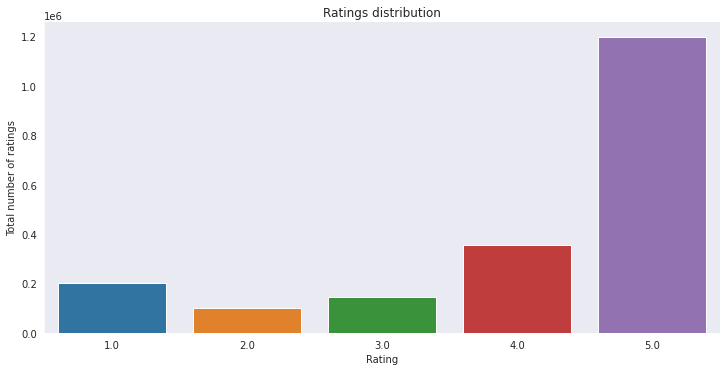

In [6]:
#Display the distribution of customer ratings
with sns.axes_style('dark'):
  gh = sns.factorplot("Rating", data=ratings_electronics, aspect=2.0, kind='count')
  gh.set_ylabels("Total number of ratings")
  plt.title("Ratings distribution")

From the distribution above, most customers gave a 5 star rating to electronics on amazon's store. 

In [10]:
#Getting the total number of customers and products reviewed in the data subset 
print("Total number of unique customers and rated products\n","_"*60)
print("Unique users: ", len(np.unique(ratings_electronics.UserID)))
print("Total number of rated products: ", len(np.unique(ratings_electronics.ProductID)))
print("Total number of ratings: ", ratings_electronics.shape[0])

Total number of unique customers and rated products
 ____________________________________________________________
Unique users:  1450854
Total number of rated products:  24216
Total number of ratings:  2000000


1,450,854 customers provided 2 million ratings for 24,216 products

In [22]:
#Dropping columns not needed in the analysis 
ratings_electronics.drop(['Timestamp'], axis=1, inplace=True)


In [23]:
ratings_electronics.head()

,Unnamed: 0,ProductID,UserID,Rating
0,0,0060009810,A1N070NS9CJQ2I,5.0
1,1,0060009810,A3P0KRKOBQK1KN,5.0
2,2,0060009810,A192HO2ICJ75VU,5.0
3,3,0060009810,A2T278FKFL3BLT,4.0
4,4,0060009810,A2ZUXVTW8RXBXW,5.0


In [7]:
#Determing the number of ratings provided by each user

rates_per_user=ratings_electronics.groupby(by='UserID')['Rating'].count().sort_values(ascending=False)
rates_per_user.head()

UserID
A5JLAU2ARJ0BO     275
A6FIAB28IS79      174
A231WM2Z2JL0U3    172
A3OXHLG6DIBRW8    140
A680RUE1FDO8B     121
Name: Rating, dtype: int64

From the data subset that is going to be used in building the recommendation system, the most ratings provided by one customer is 275.

## **Popularity-Based Recommendation**

This system utilizes the popularity characteristics of products as popularity of a product greatly influences consumer purchasing decisions and often represents important characteristics of a product.

One major setback with this method is that, it can't be personalized. 

In [24]:
#Downsizing dataframe to only contain products that received 45 ratings and above
most_rates = ratings_electronics.groupby("ProductID").filter(lambda x:x["Rating"].count()>=45)


Downsized the dataframe to only contain products that received 45 ratings and above. 

In [27]:
most_rates.head()

,Unnamed: 0,ProductID,UserID,Rating
7,7,0060786817,A2UNA438B0FRA8,5.0
8,8,0060786817,A2NQQSHSQKKGEX,5.0
9,9,0060786817,A5EXND10WD4PM,3.0
10,10,0060786817,AVJ37XQN3ID16,5.0
11,11,0060786817,A21NVBFIEQWDSG,4.0


Text(0.5, 1.0, 'Rating Per Product')

Text(0.5, 0, 'Product')

Text(0, 0.5, 'Ratings per product')

[]

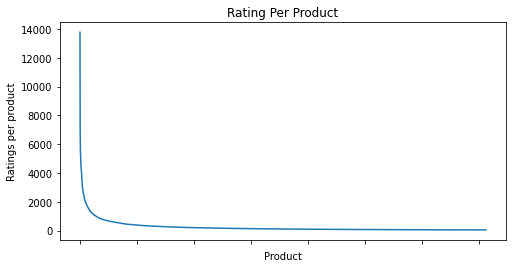

In [28]:
#plotting the rating per product
ratings_per_pdt = most_rates.groupby("ProductID")["Rating"].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(ratings_per_pdt.values)
plt.title("Rating Per Product")
plt.xlabel('Product')
plt.ylabel('Ratings per product')
ax.set_xticklabels([])

plt.show()